<a href="https://colab.research.google.com/github/AtharvaAgalawe/djs-compute-tasks/blob/main/ufc_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
uploaded = files.upload()

for fn in uploaded.keys():
  print("User uploaded file:", fn)

Saving ufc-fighters-statistics.csv to ufc-fighters-statistics (1).csv
User uploaded file: ufc-fighters-statistics (1).csv


In [14]:
df = pd.read_csv(list(uploaded.keys())[0])
print(df.head())
print(df.info())
print(df.describe())

                name    nickname  wins  losses  draws  height_cm  \
0    Robert Drysdale         NaN     7       0      0     190.50   
1  Daniel McWilliams  The Animal    15      37      0     185.42   
2         Dan Molina         NaN    13       9      0     177.80   
3          Paul Ruiz         NaN     7       4      0     167.64   
4    Collin Huckbody      All In     8       2      0     190.50   

   weight_in_kg  reach_in_cm    stance date_of_birth  \
0         92.99          NaN  Orthodox    1981-10-05   
1         83.91          NaN       NaN           NaN   
2         97.98          NaN       NaN           NaN   
3         61.23          NaN       NaN           NaN   
4         83.91       193.04  Orthodox    1994-09-29   

   significant_strikes_landed_per_minute  significant_striking_accuracy  \
0                                   0.00                            0.0   
1                                   3.36                           77.0   
2                            

In [15]:
# keeping track of missing values
print(df.isnull().sum())

# Removing duplicates
df = df.drop_duplicates()
df = df.drop('nickname',axis=1)

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64


In [16]:
# Selecting all numerical columns to handle their missing values
num_cols = df.select_dtypes(include=['float64','int64']).columns

# Filling missing values with the median value of the column
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Selecting all categorical columns to handle their missing values
cat_cols = df.select_dtypes(include=['object']).columns

# Filling missing values with the most recurring value in the column
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [17]:
# Converting heigth and weigth to their numeric values
def clean_numeric(val):
    try:
        return float(str(val).replace("cm","").replace("kg","").strip())
    except:
        return np.nan

if "height_cm" in df.columns:
    df["height_cm"] = df["height_cm"].apply(clean_numeric)
if "weight_in_kg" in df.columns:
    df["weight_in_kg"] = df["weight_in_kg"].apply(clean_numeric)


In [18]:
# Removing outliers in Weight using IQR
Q1 = df["weight_in_kg"].quantile(0.25)
Q3 = df["weight_in_kg"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["weight_in_kg"] >= (Q1 - 1.5*IQR)) & (df["weight_in_kg"] <= (Q3 + 1.5*IQR))]


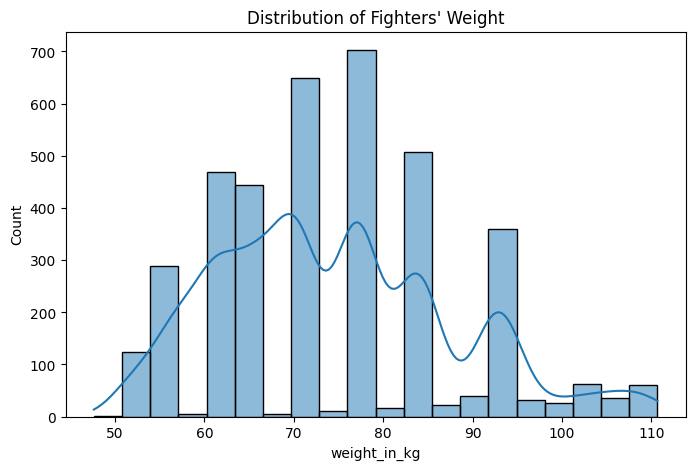

In [19]:
# ploting histogram to get no. of wrestlers in a weight range
plt.figure(figsize=(8,5))
sns.histplot(df["weight_in_kg"], bins=20, kde=True)
plt.title("Distribution of Fighters' Weight")
plt.show()

Most fighters weigh between ~65kg and 80kg.
Distribution is slightly right-skewed

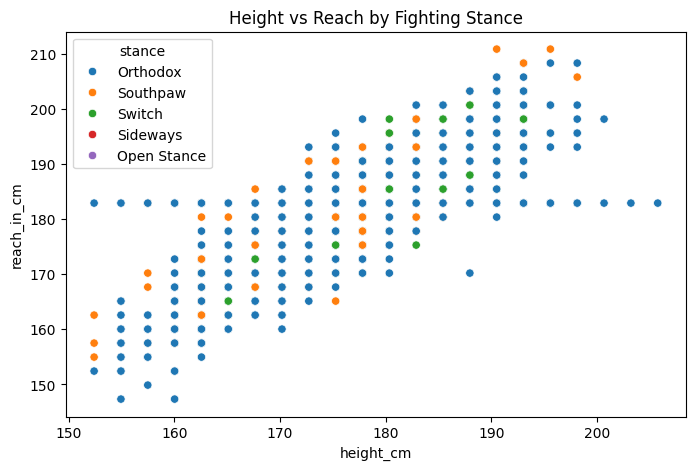

In [20]:
# Plotting scatterplot to find a relation between height and reach
plt.figure(figsize=(8,5))
sns.scatterplot(x="height_cm", y="reach_in_cm", data=df, hue="stance")
plt.title("Height vs Reach by Fighting Stance")
plt.show()

There is a strong positive correlation between height and reach of a wrestler.

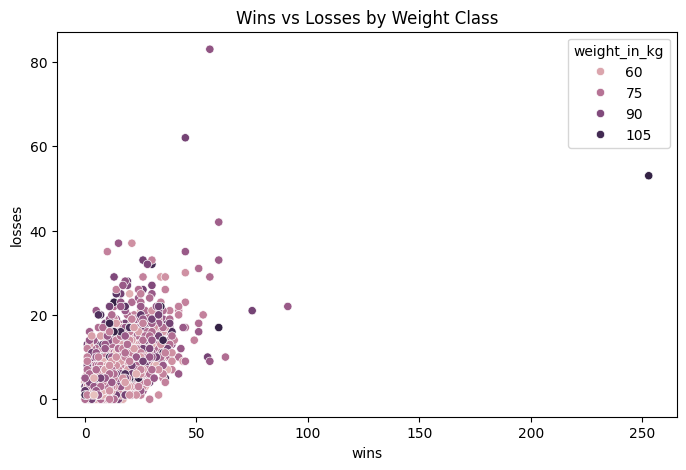

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="wins", y="losses", data=df, hue="weight_in_kg")
plt.title("Wins vs Losses by Weight Class")
plt.show()

As wins increase, losses also tend to increase, meaning longevity = more fights = more wins but also more losses. No weight class clearly dominates in terms of having fighters with the best win/loss ratio.This suggests skill > body size when it comes to career outcomes.